In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb57c8740516248ad8062afb5ccaee28


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | lasa
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | turbat
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | vallenar
Processing Record 13 of Set 1 | verkhnevilyuysk
Processing Record 14 of Set 1 | kendal
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | samarai
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | colesberg
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1

Processing Record 39 of Set 4 | hambantota
Processing Record 40 of Set 4 | cosala
Processing Record 41 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 42 of Set 4 | aklavik
Processing Record 43 of Set 4 | te anau
Processing Record 44 of Set 4 | aswan
Processing Record 45 of Set 4 | teruel
Processing Record 46 of Set 4 | urucui
Processing Record 47 of Set 4 | wajima
Processing Record 48 of Set 4 | sur
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 4 | otane
Processing Record 1 of Set 5 | resende
Processing Record 2 of Set 5 | santiago del estero
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | guerrero negro
Processing Record 5 of Set 5 | xuanhua
Processing Record 6 of Set 5 | muros
Processing Record 7 of Set 5 | bolshoy uluy
City not found. Skipping...
Processing Record 8 of Set 5 | ayan
Processing Record 9 of Set 5 | bathsheba
Processing Record 10 of Set 5 | manadhoo
Processing Record 11 of Set 5 

Processing Record 28 of Set 8 | buriti dos lopes
Processing Record 29 of Set 8 | wajir
Processing Record 30 of Set 8 | aflu
City not found. Skipping...
Processing Record 31 of Set 8 | sibiti
Processing Record 32 of Set 8 | tawnat
City not found. Skipping...
Processing Record 33 of Set 8 | ilave
Processing Record 34 of Set 8 | cayenne
Processing Record 35 of Set 8 | maldonado
Processing Record 36 of Set 8 | pevek
Processing Record 37 of Set 8 | lakatoro
Processing Record 38 of Set 8 | granja
Processing Record 39 of Set 8 | calama
Processing Record 40 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 41 of Set 8 | lakhdenpokhya
Processing Record 42 of Set 8 | garoua
Processing Record 43 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 44 of Set 8 | sao filipe
Processing Record 45 of Set 8 | buluang
Processing Record 46 of Set 8 | marienburg
Processing Record 47 of Set 8 | bolobo
Processing Record 48 of Set 8 | rio gallegos
Processing Record 49 of Set 8 |

Processing Record 15 of Set 12 | kapit
Processing Record 16 of Set 12 | takoradi
Processing Record 17 of Set 12 | kisangani
Processing Record 18 of Set 12 | tigil
Processing Record 19 of Set 12 | tyumentsevo
Processing Record 20 of Set 12 | broken hill
Processing Record 21 of Set 12 | kothapet
Processing Record 22 of Set 12 | dongsheng
Processing Record 23 of Set 12 | mazatan
Processing Record 24 of Set 12 | pingliang
Processing Record 25 of Set 12 | mrirt
City not found. Skipping...
Processing Record 26 of Set 12 | belvedere marittimo
Processing Record 27 of Set 12 | klamath falls
Processing Record 28 of Set 12 | berlevag
Processing Record 29 of Set 12 | agadez
Processing Record 30 of Set 12 | labrea
Processing Record 31 of Set 12 | dubbo
Processing Record 32 of Set 12 | ocos
Processing Record 33 of Set 12 | qaqortoq
Processing Record 34 of Set 12 | zyryanka
Processing Record 35 of Set 12 | trinitapoli
Processing Record 36 of Set 12 | ploemeur
Processing Record 37 of Set 12 | baruun-u

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,54.05,96,100,9.06,BR,2021-09-16 23:41:13
1,Bluff,-46.6000,168.3333,45.81,52,81,12.86,NZ,2021-09-16 23:41:14
2,New Norfolk,-42.7826,147.0587,53.92,62,27,1.99,AU,2021-09-16 23:41:14
3,Atuona,-9.8000,-139.0333,77.23,79,18,15.90,PF,2021-09-16 23:41:14
4,Barrow,71.2906,-156.7887,33.82,93,90,11.50,US,2021-09-16 23:41:15
5,Albany,42.6001,-73.9662,71.55,86,31,1.03,US,2021-09-16 23:37:45
6,Lasa,46.6166,10.7002,60.03,94,100,3.18,IT,2021-09-16 23:38:36
7,Airai,-8.9266,125.4092,71.35,32,65,4.29,TL,2021-09-16 23:41:15
8,Turbat,26.0023,63.0440,85.59,47,0,0.81,PK,2021-09-16 23:41:15
9,Mataura,-46.1927,168.8643,45.48,51,32,6.13,NZ,2021-09-16 23:41:16


In [14]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1631839358.85082

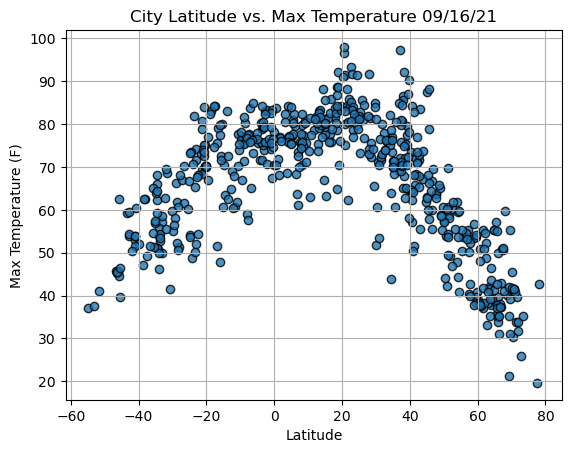

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

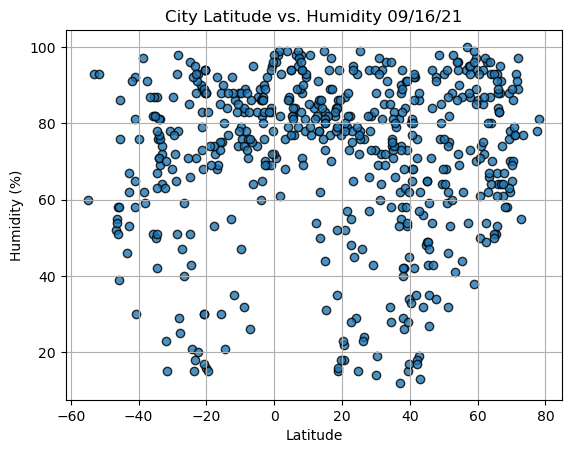

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

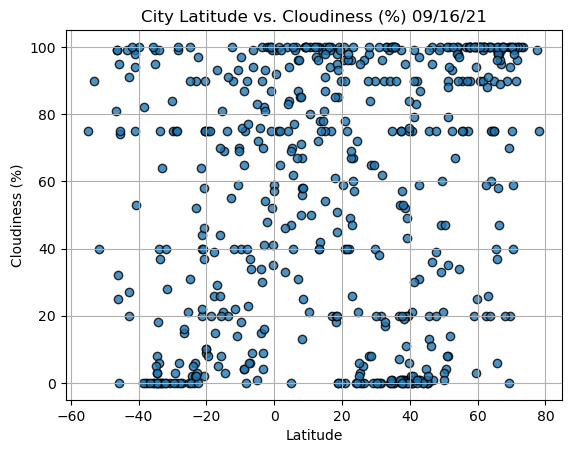

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

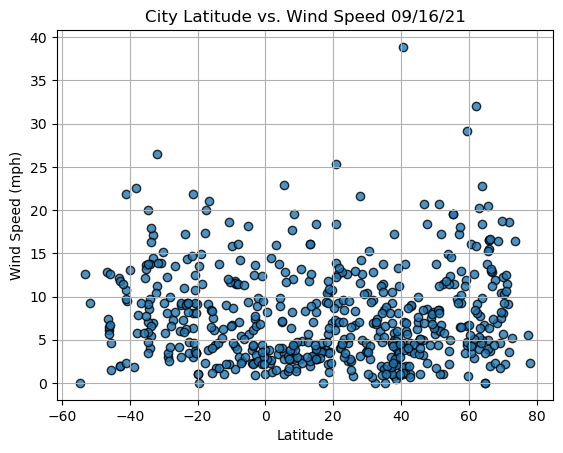

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()